<h1><center>clustering and churn predition of Telco Customer Churn Data with Machine Learning</center></h1>

This program analyses telco customer churn data, performs clustering with K-Means Clustering and predicts Churn using different Machine Learning Algorithms.

This analysis uses a dataset called 'Telco Customer Churn' in Kaggle

# Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [3]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [7]:
#droping customerID
data.drop(columns='customerID', inplace= True)

In [8]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
#Looking for duplicated values
data.duplicated().sum()

22

In [10]:
#Removing duplicates
data.drop_duplicates(inplace=True)

In [11]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
#Looking for Nulls
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
TotalCharges = data['TotalCharges'].astype(str).apply(lambda x: x if not re.search('\d+', x)else 'Numeric')
TotalCharges[TotalCharges!='Numeric']

Series([], Name: TotalCharges, dtype: object)

In [16]:
data.drop(index=TotalCharges[TotalCharges!='Numeric'].index, inplace=True)

# Data Visualization

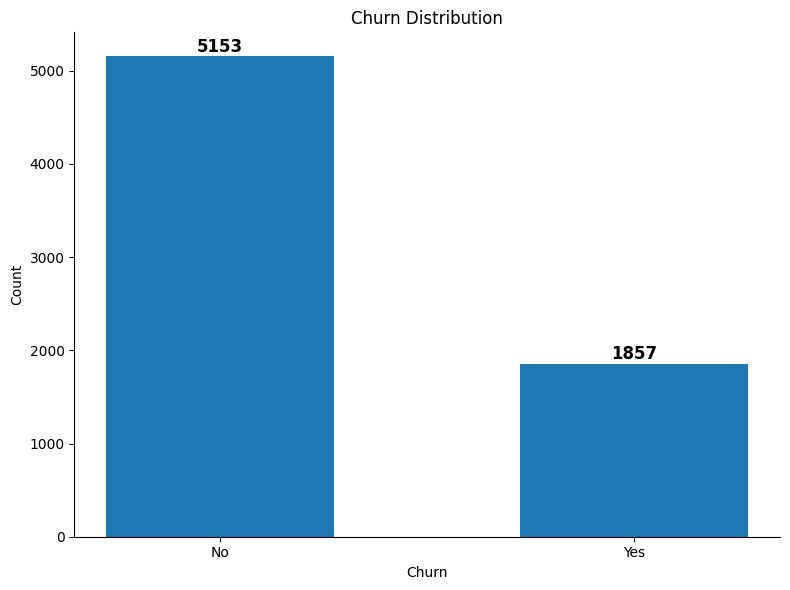

In [50]:
# Plotting the bar chart for count of 'Churn' column
data_temp = data['Churn'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(data_temp.index, data_temp, width=0.55)
ax.set_title('Churn Distribution')
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
for i, count in enumerate(data_temp):
    ax.text(i, count + 50, str(count), ha='center', fontsize=12, fontweight='bold')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

plt.tight_layout()
plt.show()

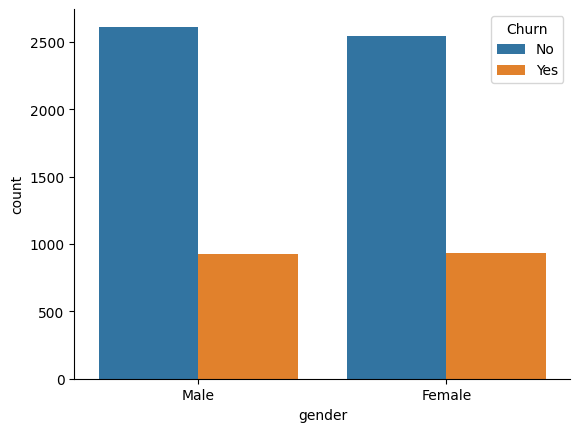

In [22]:
#Barchart for Churn vs Gender
sns.countplot(x='gender', hue="Churn", data=data, order=data['gender'].value_counts().index)
sns.despine()

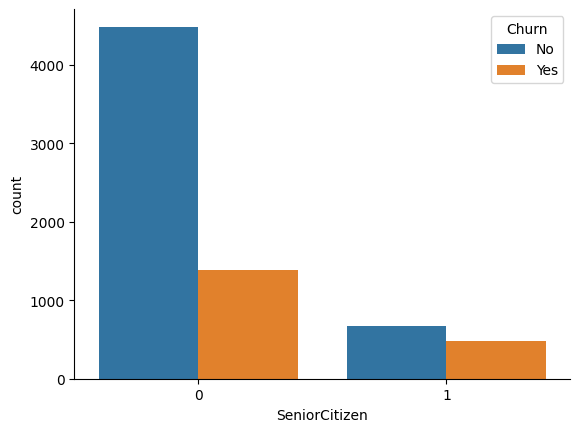

In [21]:
#Barchrt for Churn vs SeniorCitizen
sns.countplot(x='SeniorCitizen', hue="Churn", data=data,order=data['SeniorCitizen'].value_counts().index)
sns.despine()

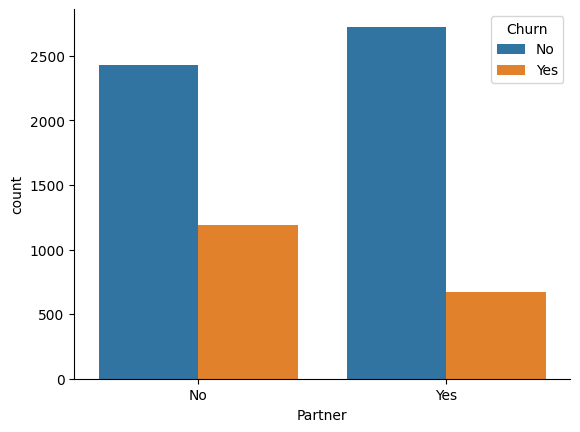

In [20]:
#Barchart for Churn vs Partner
sns.countplot(x='Partner', hue="Churn", data=data, order=data['Partner'].value_counts().index)
sns.despine()

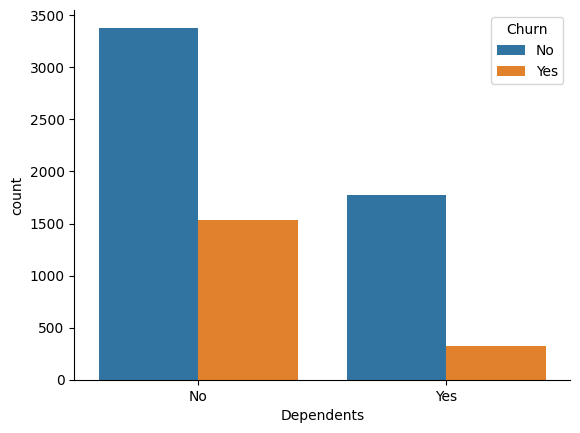

In [23]:
#Barchart for Churn vs Dependents
sns.countplot(x='Dependents', hue="Churn", data=data, order=data['Dependents'].value_counts().index)
sns.despine()

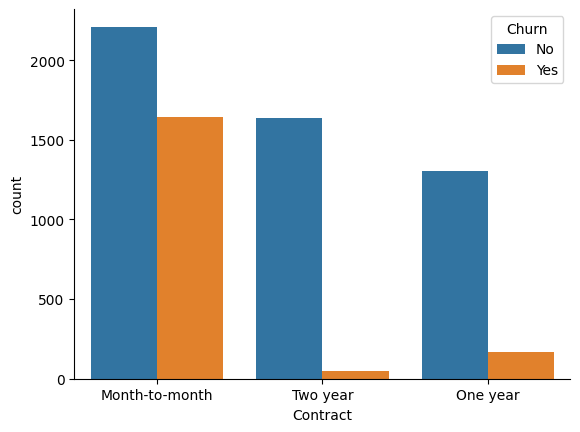

In [25]:
#Barchart for Churn vs Contract
sns.countplot(x='Contract', hue="Churn", data=data, order=data['Contract'].value_counts().index)
sns.despine()

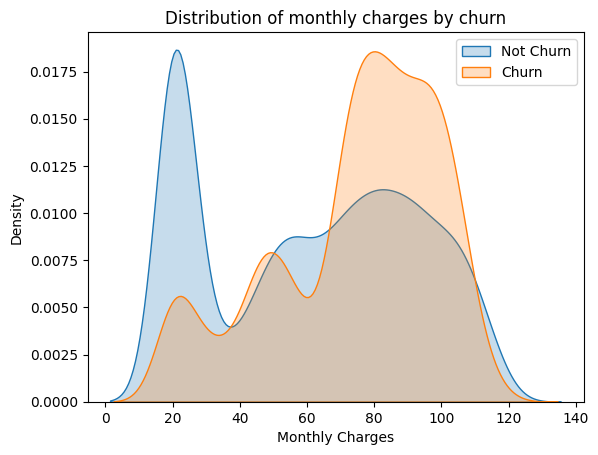

In [26]:
#dependencey chart for Churn vs MonthlyCharges
ax = sns.kdeplot(data['MonthlyCharges'][data["Churn"] == 'No'], fill = True)
ax = sns.kdeplot(data['MonthlyCharges'][data["Churn"] == 'Yes'],ax =ax, fill= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn');

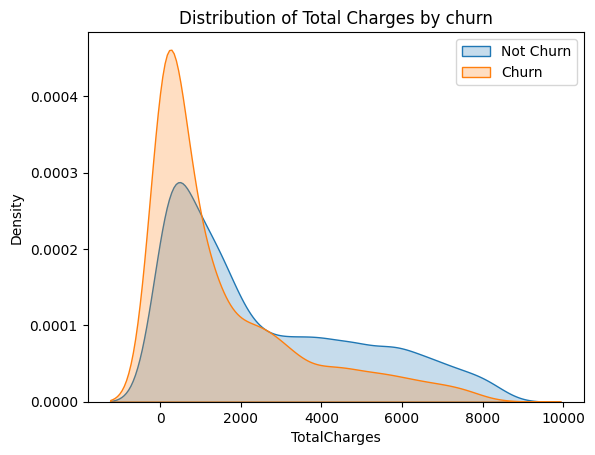

In [27]:
#dependencey chart for Churn vs TotalCharges
data['TotalCharges']= data['TotalCharges'].astype(float)
ax = sns.kdeplot(data['TotalCharges'][data["Churn"] == 'No'], fill = True)
ax = sns.kdeplot(data['TotalCharges'][data["Churn"] == 'Yes'],ax =ax,fill= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('TotalCharges')
ax.set_title('Distribution of Total Charges by churn');

# Customer Segmentation with K Means Clustering

In [28]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
cluster_df= data.copy()
numerics_columns= ['tenure', 'MonthlyCharges', 'TotalCharges']
cate_columns= [i for i in data.columns if i not in numerics_columns]
scaler = StandardScaler()
cluster_df[numerics_columns]= scaler.fit_transform(cluster_df[numerics_columns])

In [29]:
#Label Encoding for categorical columns
label_encoders = {}
for col in cate_columns:
    label_encoders[col] = LabelEncoder()
    cluster_df[col] = label_encoders[col].fit_transform(cluster_df[col])

## K means Clustering

In [30]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
wcss = []  #List to store sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(cluster_df)
    wcss.append(kmeans.inertia_)  # Inertia: within-cluster sum of squares

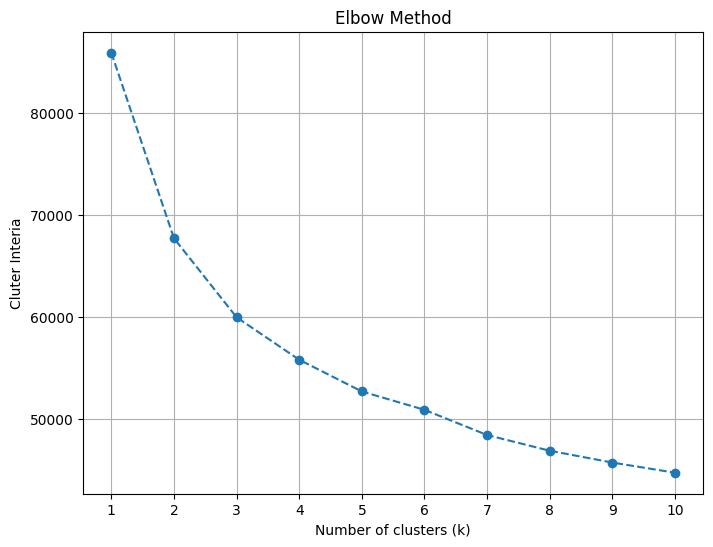

In [31]:
#Plotting the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cluter Interia')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show();

In [32]:
# K-Means clustering
kmeans = KMeans(n_clusters = 4,  random_state=42)
kmeans.fit(cluster_df)
cluster_df['Cluster'] = kmeans.labels_ # Saving cluster group as a column value in our data frame

<function matplotlib.pyplot.show(close=None, block=None)>

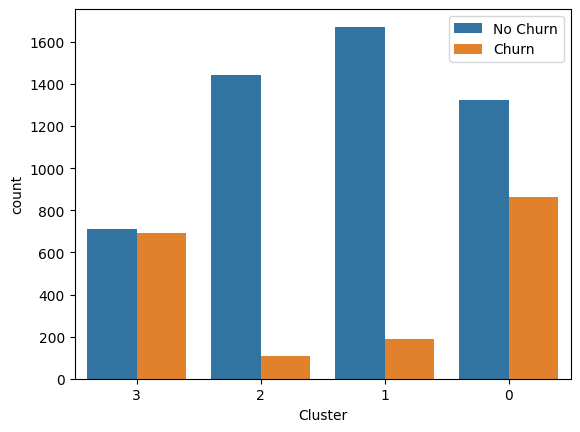

In [34]:
sns.countplot(x='Cluster', hue="Churn", data=cluster_df, order=cluster_df['Cluster'].value_counts(ascending=True).index)
plt.legend(title='', loc='upper right', labels=['No Churn', 'Churn'])
plt.show

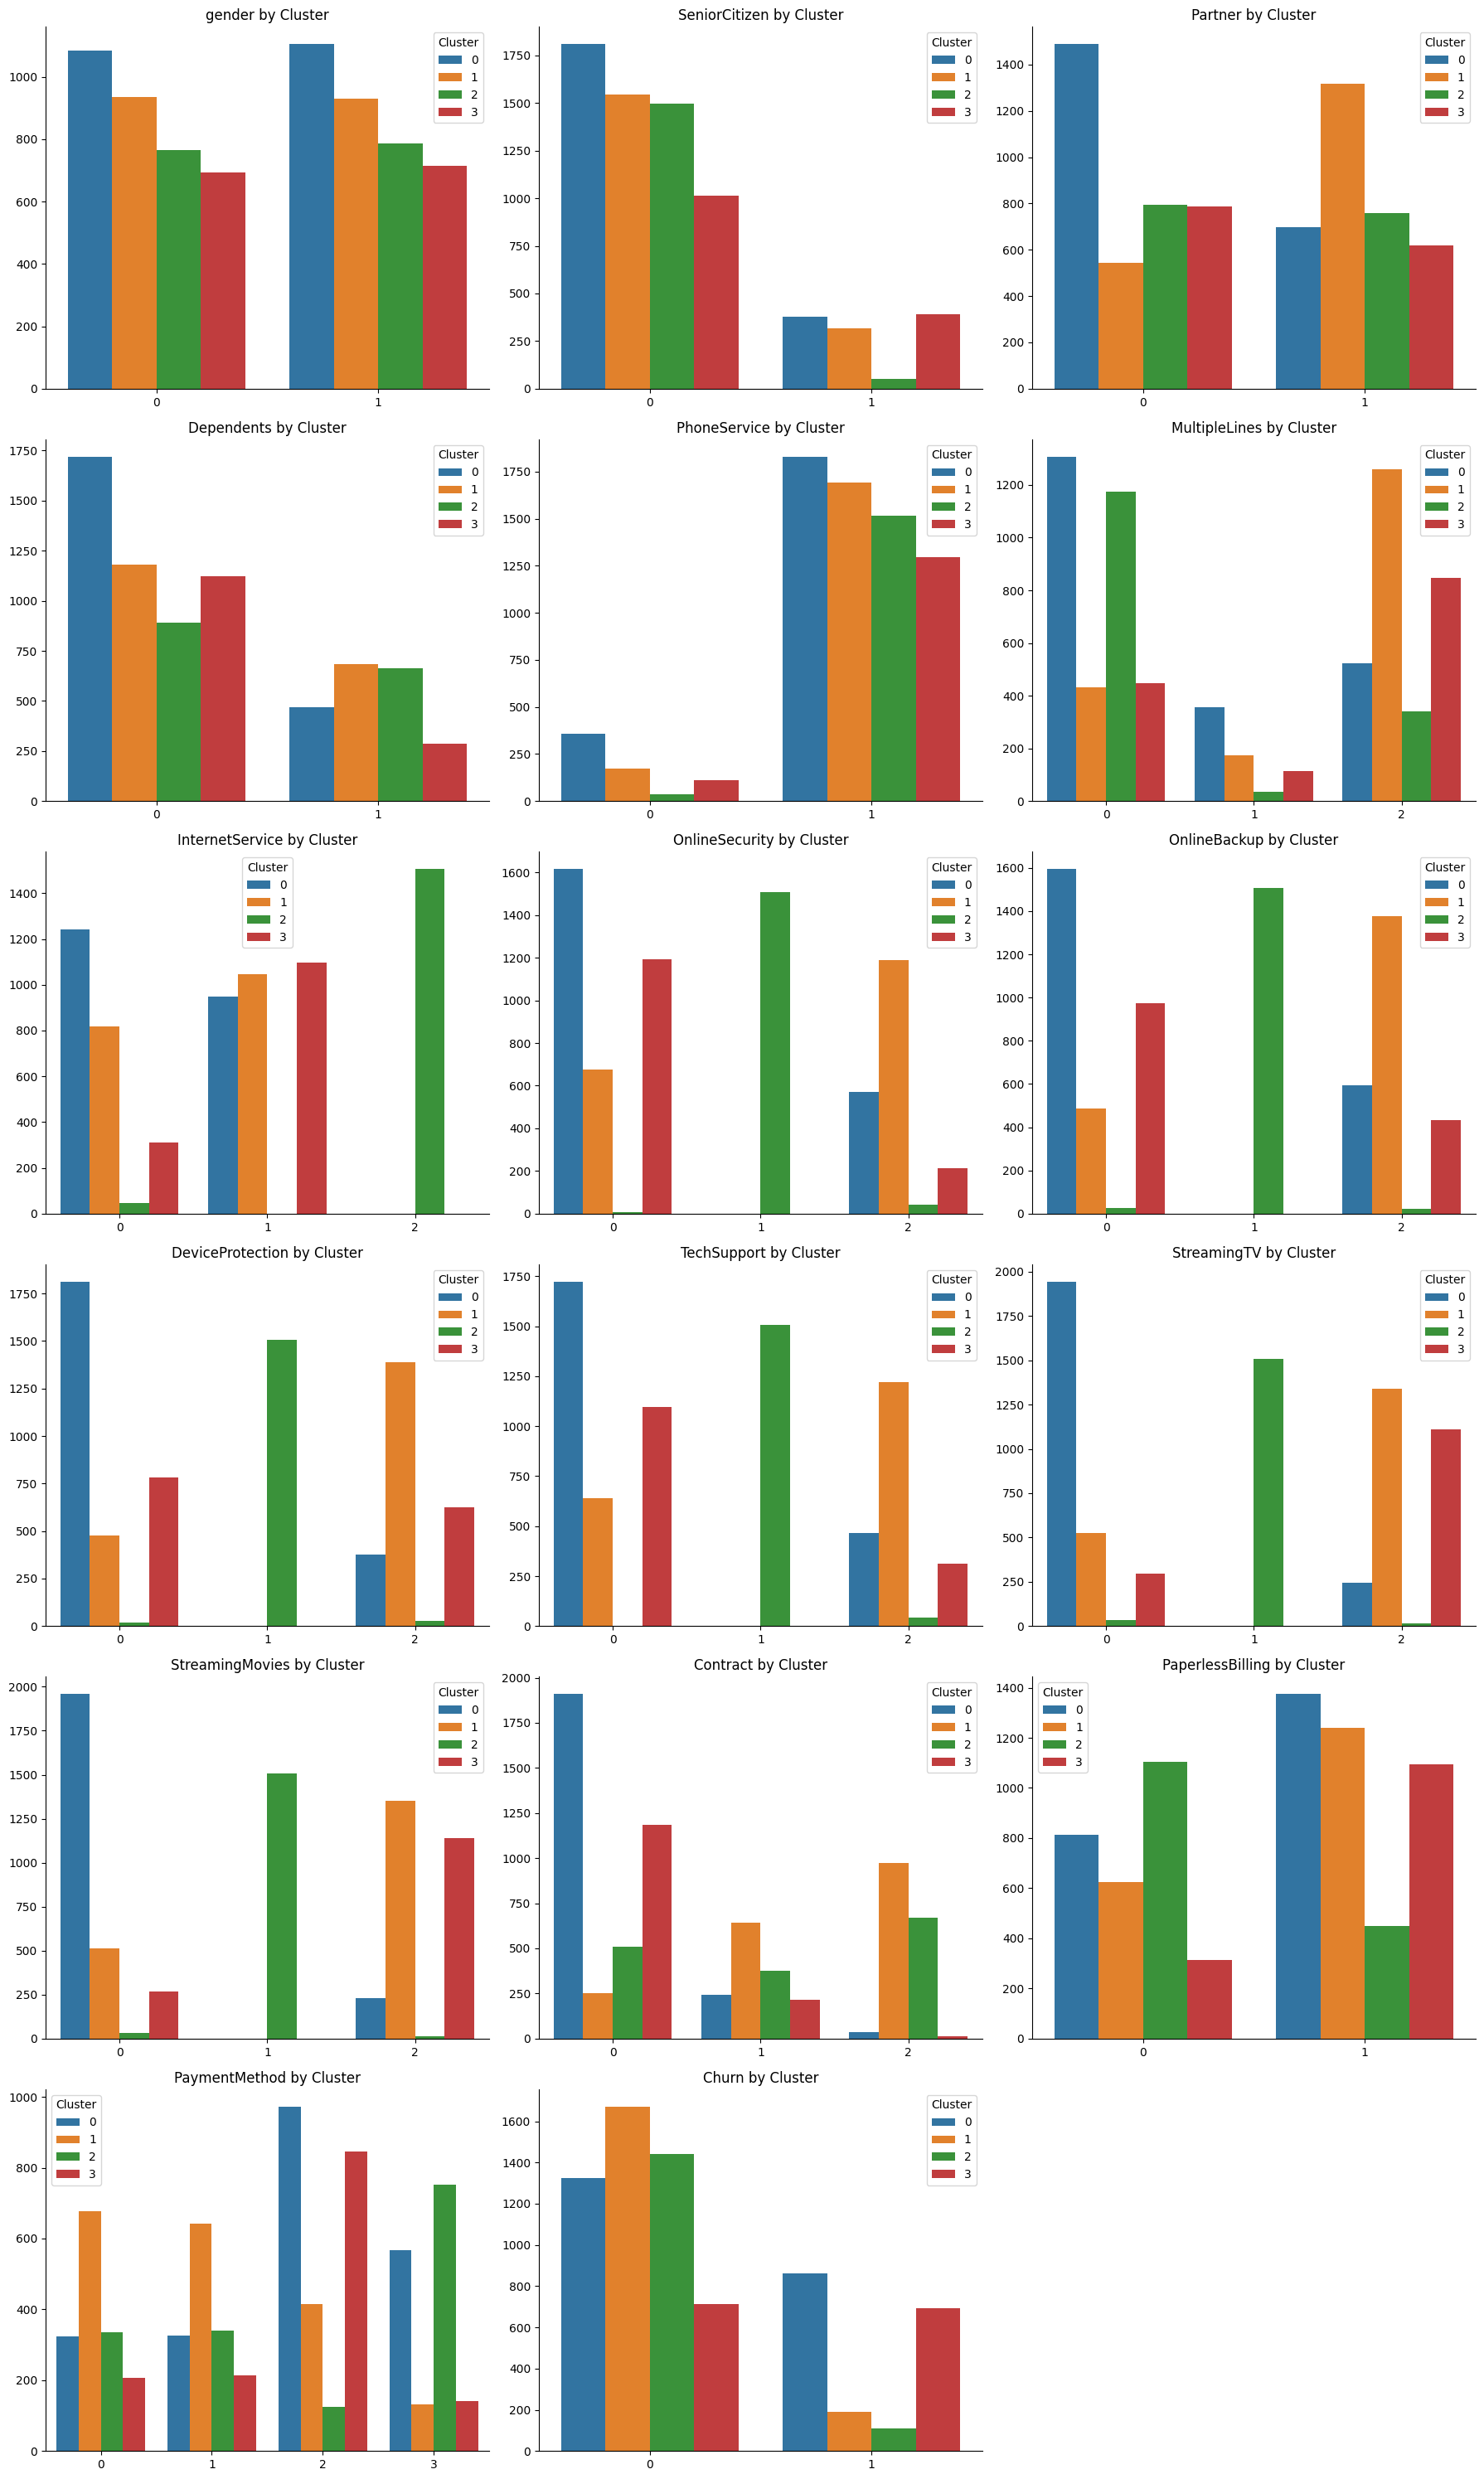

In [35]:
#Visualize Clusters with all cateorical columns
cat_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
num_cols = 3 #number of columns for subplot arrangement
num_rows = (len(cat_columns) + num_cols - 1) // num_cols  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 5 * num_rows))
if num_rows == 1:
    axes = axes.reshape(1, -1)
else:
    axes = axes.flatten()
# Iterate through each categorical column and create count plots against 'Cluster'
for i, column in enumerate(cat_columns):
    if i < len(axes):
        sns.countplot(x=column, hue='Cluster', data=cluster_df, ax=axes[i]).set(
            title=f'{column} by Cluster', xlabel=None, ylabel=None)
        axes[i].legend(title='Cluster')
        sns.despine()
for i in range(len(cat_columns), num_rows * num_cols):#Hide any empty subplots
    axes[i].axis('off')
plt.tight_layout()
plt.show()

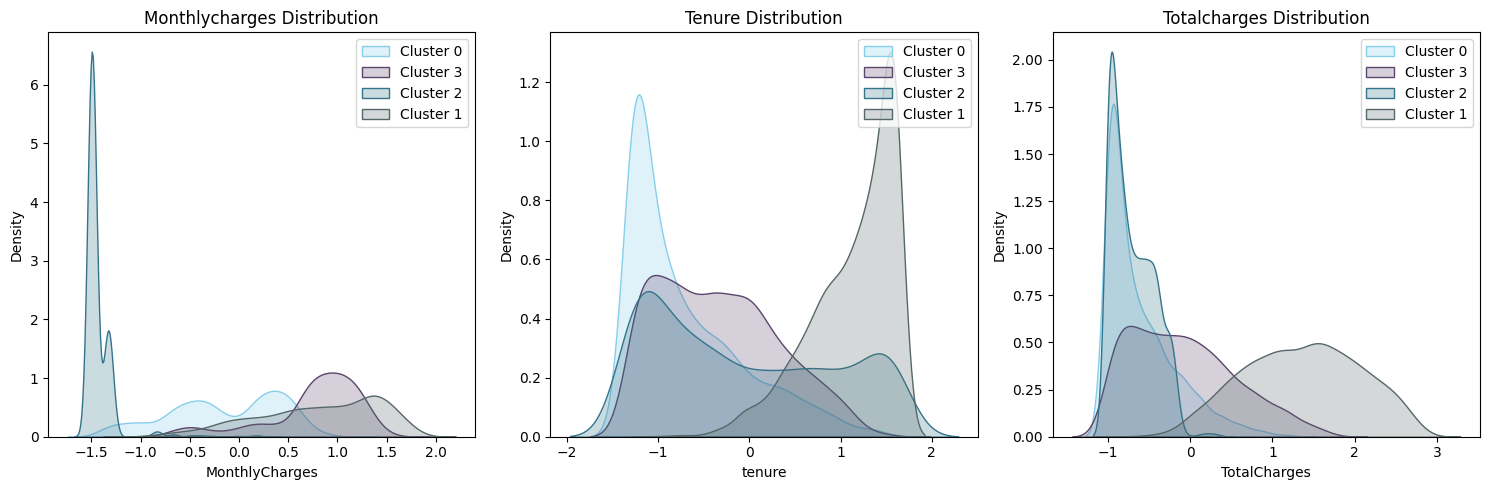

In [53]:
#Visualize Clusters with all numerical columns
num_columns = ['MonthlyCharges', 'tenure', 'TotalCharges']
color_palette = ['skyblue', '#5b456c', '#33748b','#566769']
plt.figure(figsize=(15, 5))
for i, column in enumerate(num_columns, 1):
    plt.subplot(1, 3, i)
    for idx, cluster in enumerate(cluster_df['Cluster'].unique()):
        sns.kdeplot(cluster_df[cluster_df['Cluster'] == cluster][column],
                    label=f'Cluster {cluster}',
                    shade=True,
                    color=color_palette[idx % len(color_palette)])
    plt.title(f'{column.capitalize()} Distribution')
    plt.legend()
plt.tight_layout()
plt.show()

# Machine learning Models

## Data Preprocessing

In [38]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
ml_df = data.copy()
numerics_columns= ['tenure', 'MonthlyCharges', 'TotalCharges']
cate_columns= [i for i in ml_df.columns if i not in numerics_columns]
scaler = StandardScaler()
ml_df[numerics_columns]= scaler.fit_transform(ml_df[numerics_columns])

In [39]:
#Label Encoding for categorical columns
label_encoders = {}
for col in cate_columns:
    label_encoders[col] = LabelEncoder()
    ml_df[col] = label_encoders[col].fit_transform(ml_df[col])

In [40]:
X = ml_df.drop(columns = ['Churn']) # independent valriables
y = ml_df['Churn'].values #target

In [41]:
#Spliting the data for testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

## Hyperparmater Tuning

In [42]:
from sklearn.model_selection import GridSearchCV
def Prune_model(grid, model):
    gcv = GridSearchCV(estimator = model, param_grid = grid,cv = 3, n_jobs = -1)
    gcv.fit(X_train, y_train)
    print(gcv.best_params_)
    return gcv

## K-Nearest Neighbors

In [43]:
from sklearn.neighbors import KNeighborsClassifier
k_grid={'leaf_size': range(1,20),
        'p': [1,2],
        'n_neighbors': range(1,21,3)}
k_model = KNeighborsClassifier()
k_grid_model= Prune_model(k_grid, k_model)
k_grid_model.score(X_train, y_train),k_grid_model.score(X_test, y_test)

{'leaf_size': 1, 'n_neighbors': 10, 'p': 1}


(0.8182952924393724, 0.7674750356633381)

## DecisionTreeClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
grid = {'max_depth': [10, 20, 30, None],
         'min_samples_split': [2, 3, 4],
         'min_samples_leaf': [10, 20, 30]}
ct_model = DecisionTreeClassifier()
ct_grid = Prune_model(grid,ct_model)
ct_grid.score(X_train, y_train),ct_grid.score(X_test, y_test)

{'max_depth': 20, 'min_samples_leaf': 20, 'min_samples_split': 2}


(0.8322039942938659, 0.7788873038516405)

## RandomForestClassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
random_grid={'max_depth': [10, 20, 30, None],
             'min_samples_leaf': [1, 2],
             'min_samples_split': [4,7],
             'n_estimators': [250,300,350]}
rf_model = RandomForestClassifier()
rf_grid = Prune_model(random_grid, rf_model)
rf_grid.score(X_train, y_train),rf_grid.score(X_test, y_test)

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 350}


(0.8803495007132668, 0.7888730385164051)

## LogisticRegression

In [47]:
from sklearn.linear_model import LogisticRegression
grid = {
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
}
LR_model = LogisticRegression()
LR_grid = Prune_model(grid, LR_model)
LR_grid.score(X_train, y_train),LR_grid.score(X_test, y_test)

{'C': 1.623776739188721, 'max_iter': 100, 'solver': 'lbfgs'}


(0.8074179743223966, 0.7917261055634808)

# Analysing Predictions Scores

In [48]:
from sklearn.metrics import f1_score,accuracy_score, jaccard_score
accu_preds = [k_grid_model.predict(X_test) , ct_grid.predict(X_test), rf_grid.predict(X_test), LR_grid.predict(X_test)]
accu_df = pd.DataFrame(index=['K-Nearest Neighbors','DecisionTreeClassifier','Random Forest Classifier','Logistic Regression'])
accu_df['Acuuracy_score']=[accuracy_score(y_test,i) for i in accu_preds]
accu_df['F1_score']=[f1_score(y_test, i, average='weighted')  for i in accu_preds]
accu_df['Jaccard_score']=[jaccard_score(y_test, i,pos_label=0)  for i in accu_preds]
accu_df

,Acuuracy_score,F1_score,Jaccard_score
K-Nearest Neighbors,0.767475,0.757713,0.734959
DecisionTreeClassifier,0.778887,0.772196,0.744224
Random Forest Classifier,0.788873,0.778957,0.757178
Logistic Regression,0.791726,0.786114,0.756667


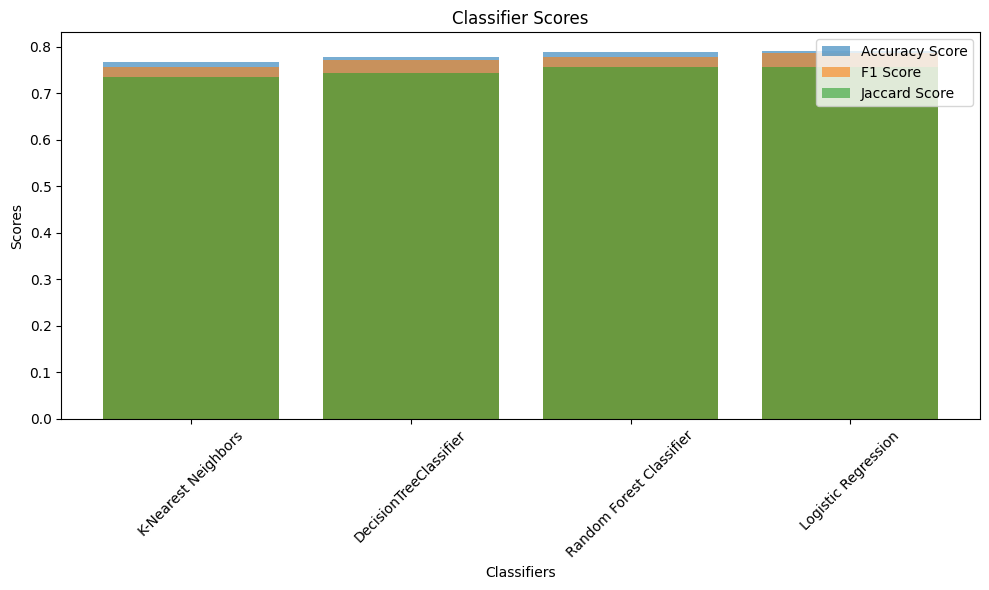

In [49]:
#Visualize the predcition score for diffrant models
plt.figure(figsize=(10, 6))
plt.bar(accu_df.index, accu_df['Acuuracy_score'],alpha=0.6, label='Accuracy Score')
plt.bar(accu_df.index, accu_df['F1_score'], alpha=0.6, label='F1 Score')
plt.bar(accu_df.index, accu_df['Jaccard_score'], alpha=0.6, label='Jaccard Score')
plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Classifier Scores')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()